In [1]:
import plotly.express as px
import warnings
#%load_ext cudf.pandas
warnings.filterwarnings("ignore")
import numpy as np
import scipy as sp
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
from summarytools import dfSummary
import sweetviz as sv
import statsmodels.api as sm
import dovpanda
import missingno as msno

In [2]:
df=pd.read_csv(r"C:\Users\fady\Downloads\Mall-Customers-main\Mall_Customers.csv")

In [3]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 200    │ │ int32       │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                 ┃ NA   ┃ NA %   ┃ mean   ┃ sd   ┃ p0  ┃ p25   ┃ p50   ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ CustomerID                  │    0 │      0 │    100 │   58 │   1 │    51 │   100 │  150 │   200 │ ▇▇▇▇▇▇  │  │
│ │ Age                         │    0 │      0 │     39 │   14 │  18 │    29 │    36 │   49 │    70 │ ▆▇▅▅▃▂  │  │
│ │ Annual Income (k$)          │    0 │      0 │     61 │   26 │  15 │    42 │    62 │   78 │   140 │ ▅▇▇▅▂▁  │  │
│ │ Spending Score (1-100)      │    0 │      0 │     50 │   26 │   1 │    35 │    50 │   73 │    99 │ ▅▃▇▇▅▅  │  │
│ └─────────────────────────────┴──────┴────────┴────────┴──────┴─────┴───────┴───────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                    │       0 │          0 │                            1 │                      200 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [5]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [6]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


<AxesSubplot: >

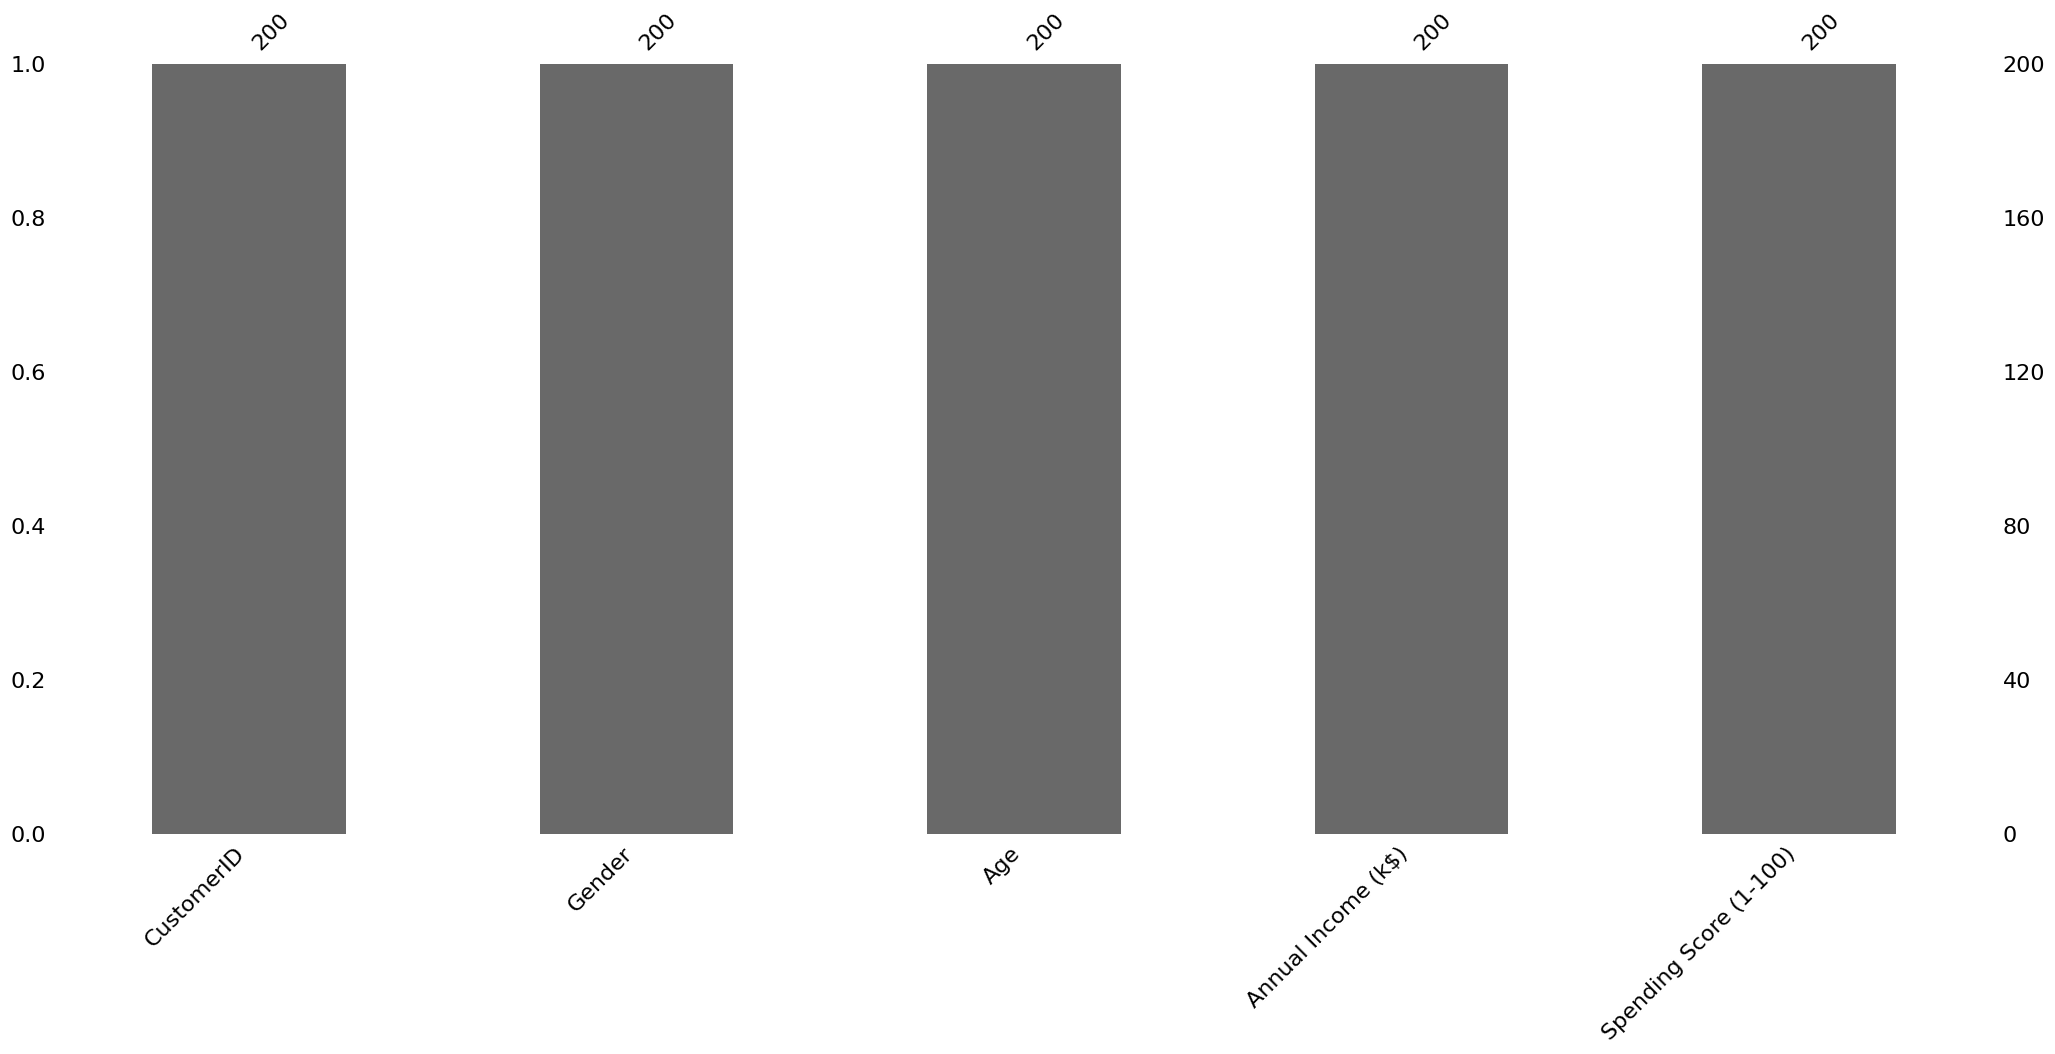

In [7]:
msno.bar(df)

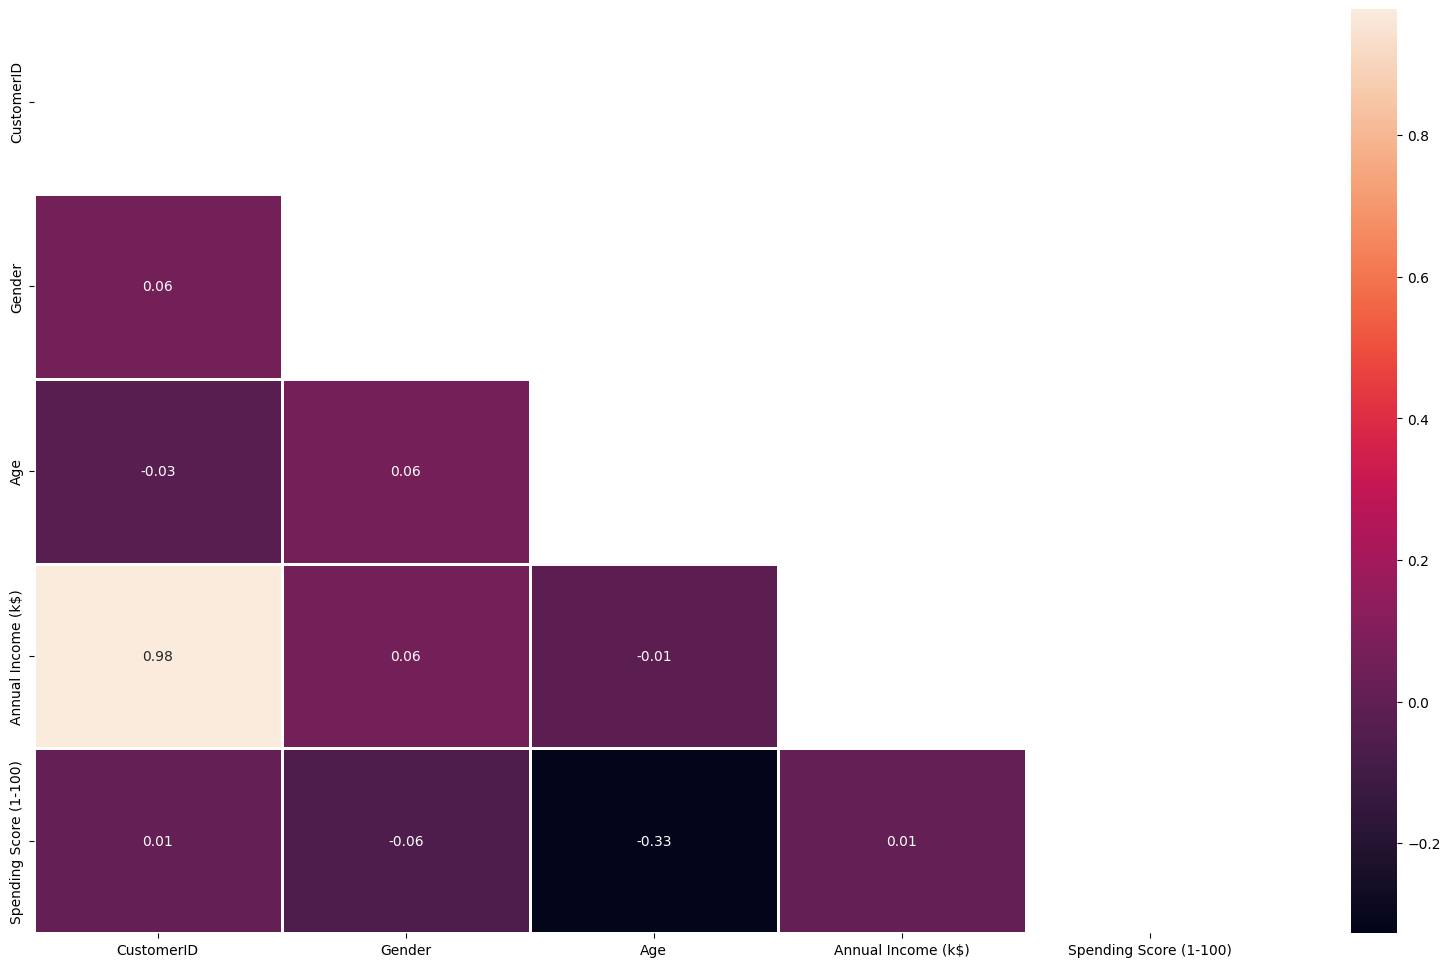

In [8]:
plt.figure(figsize = (20, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

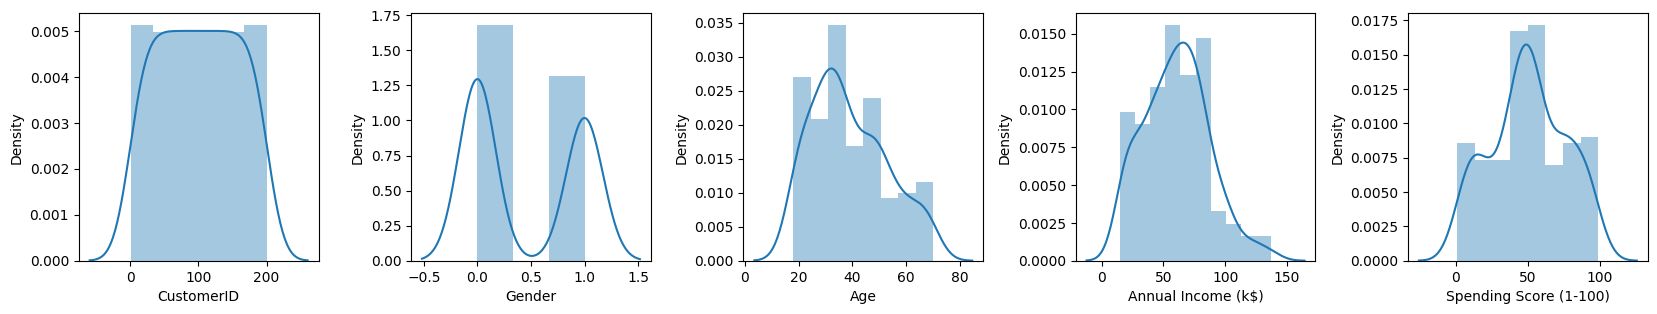

In [9]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [14]:
df['Gender'] = df['Gender'].map({1:'Male',0:'Female'})

In [15]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


                                             |                                             | [  0%]   00:00 ->…


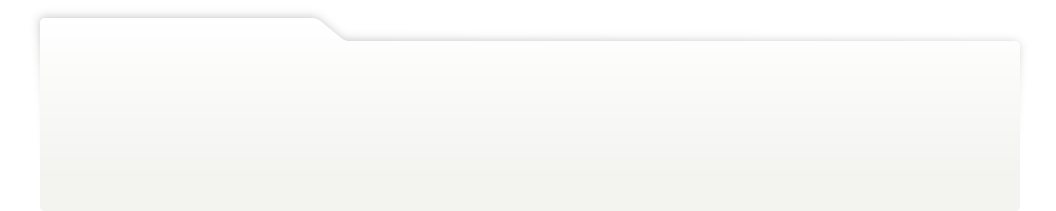
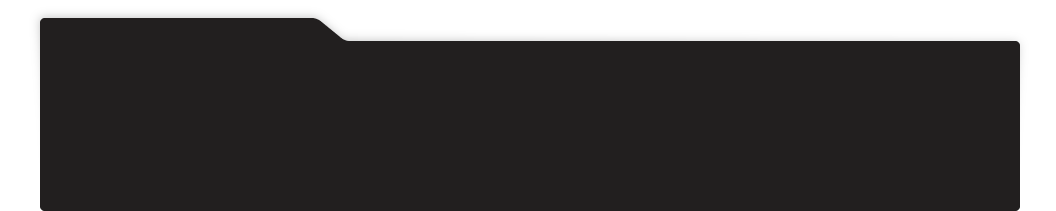
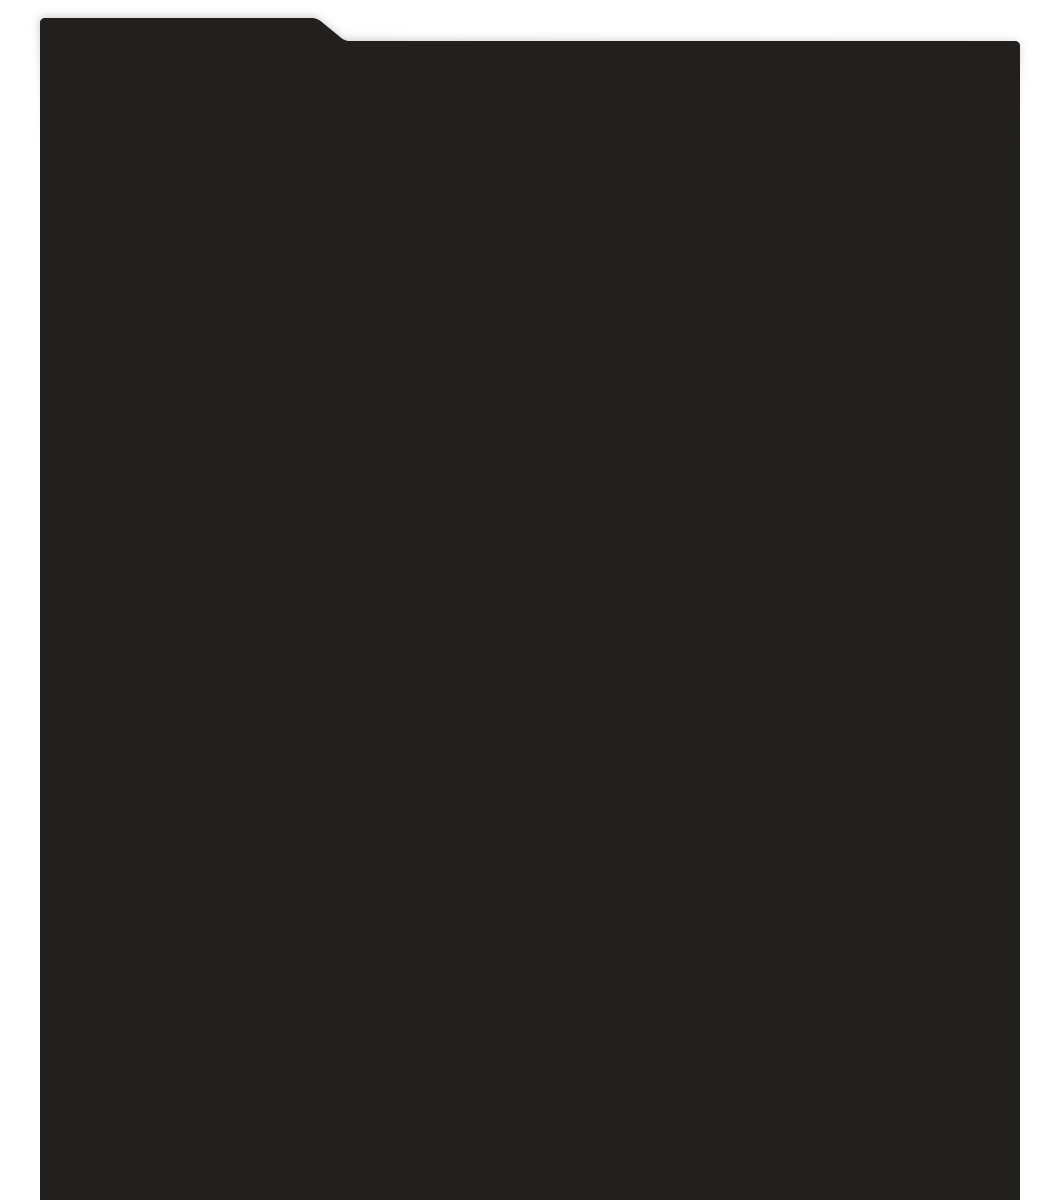
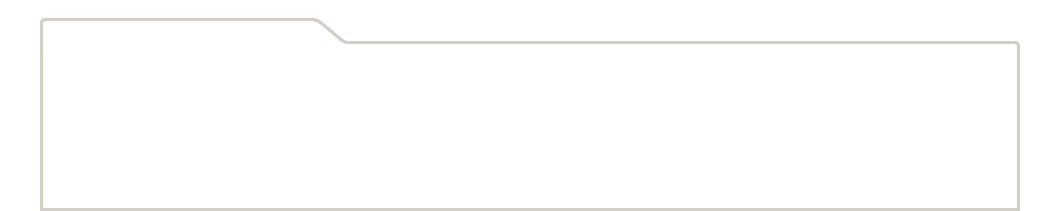
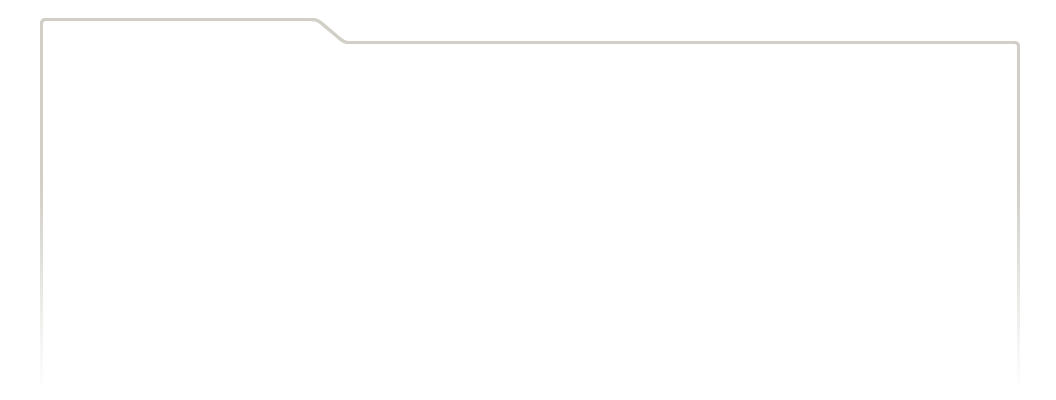
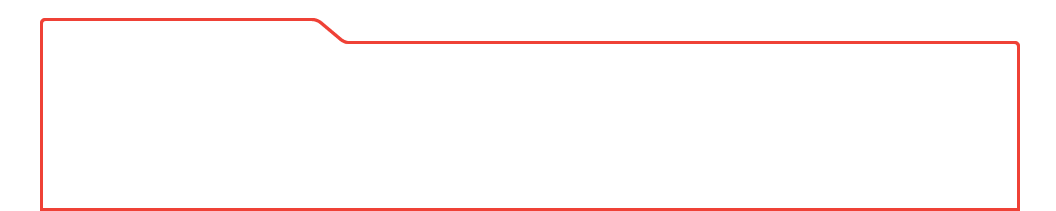
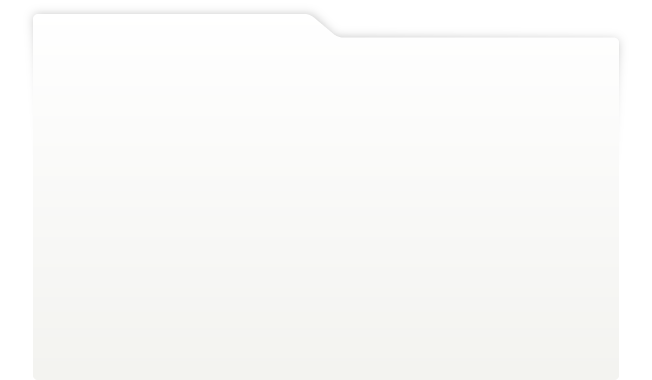
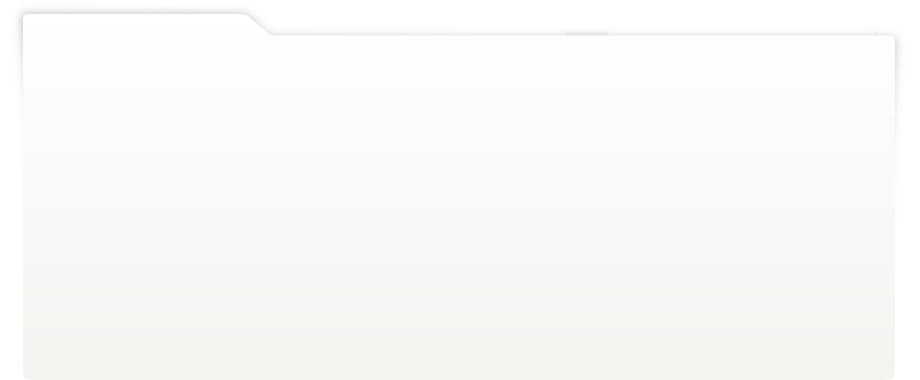
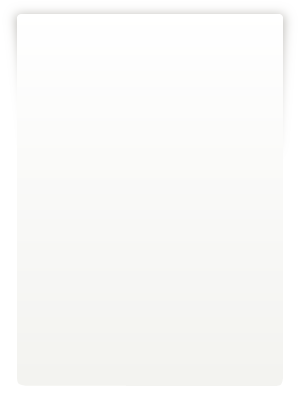
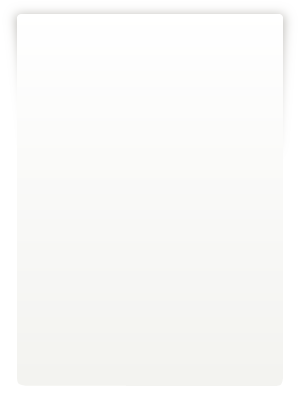
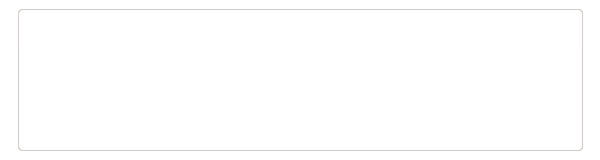
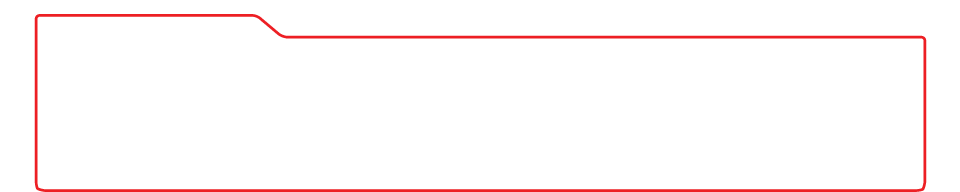
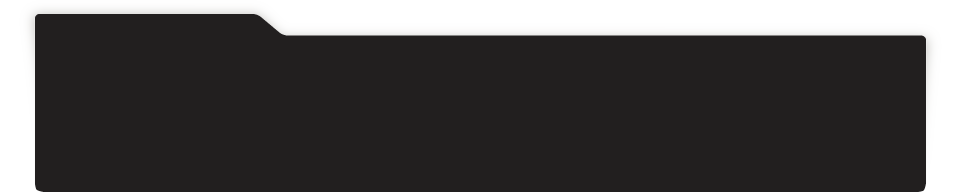
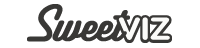
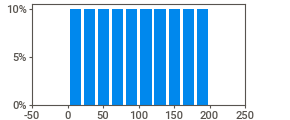
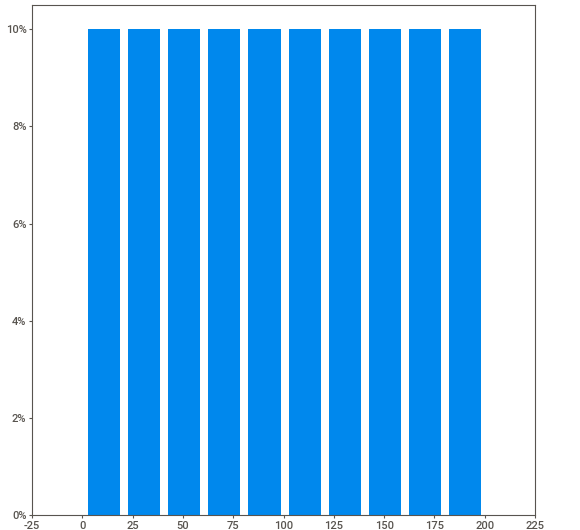
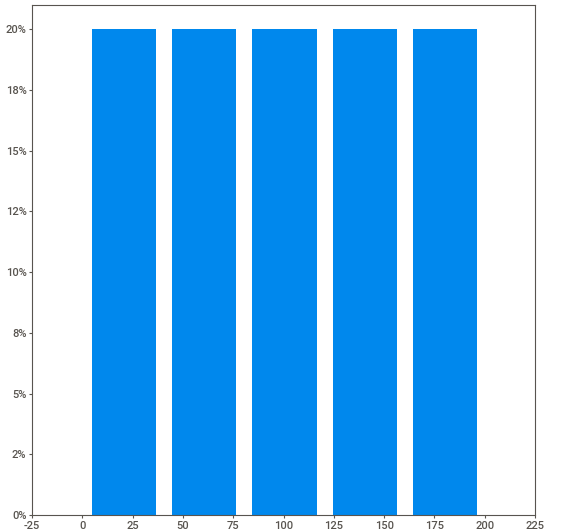
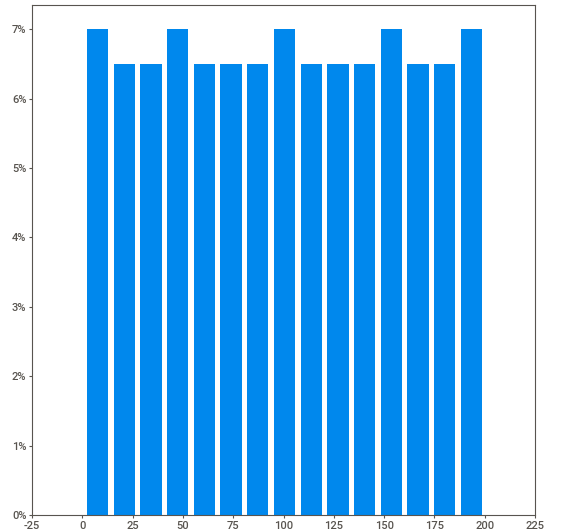
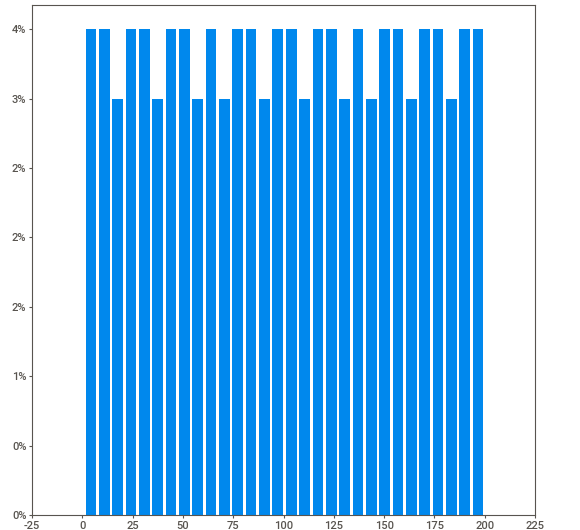
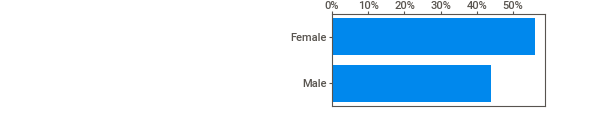
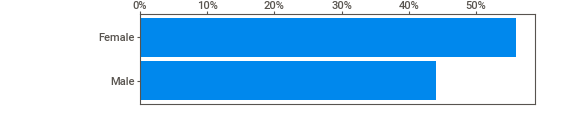
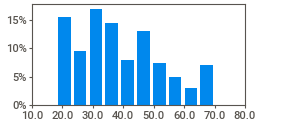
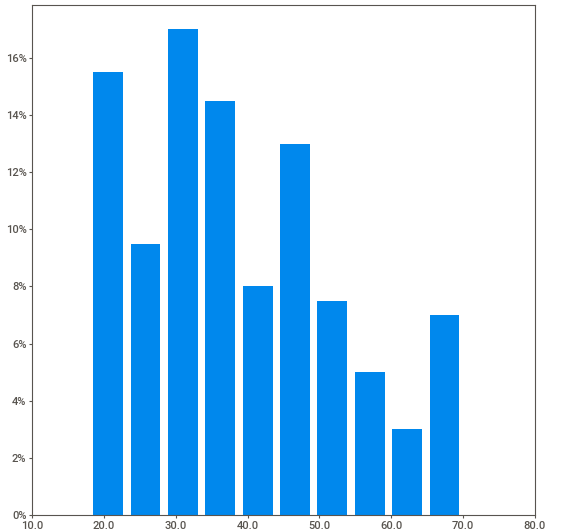
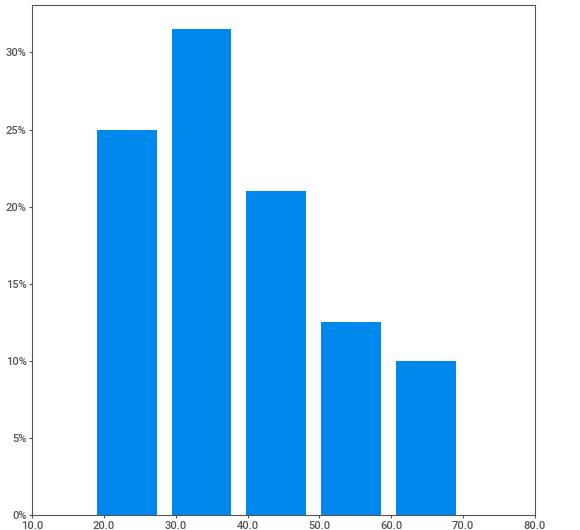
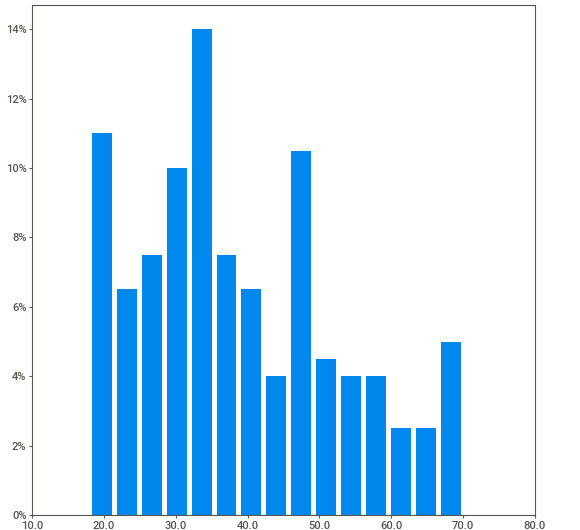
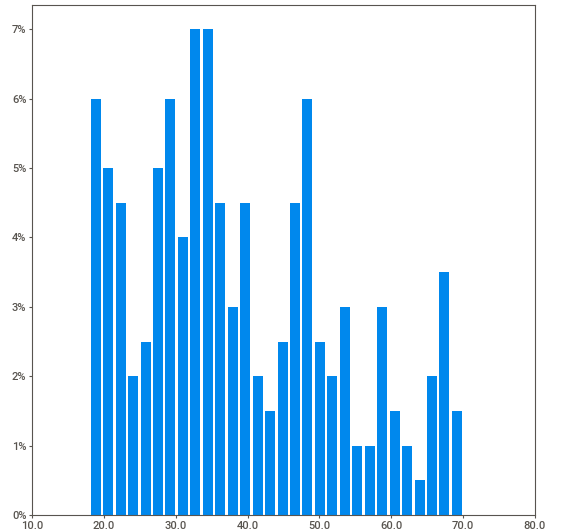
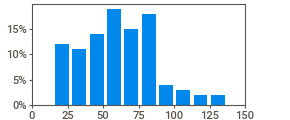
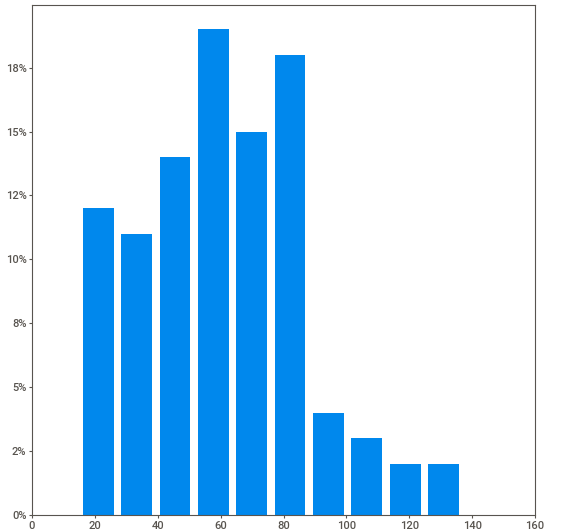
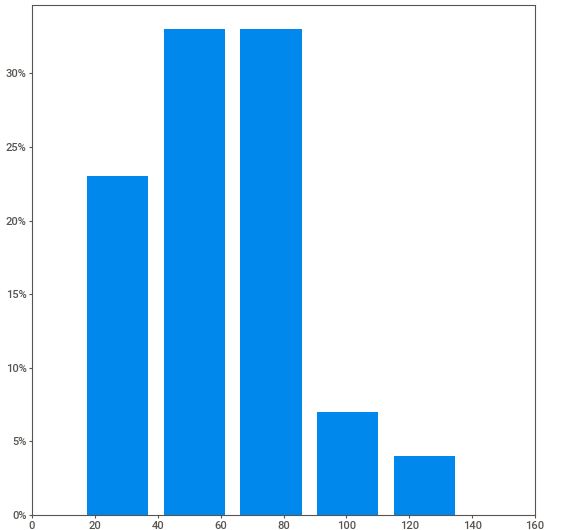
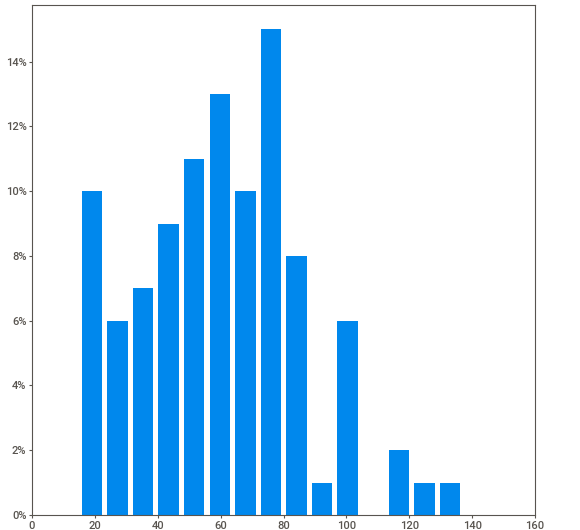
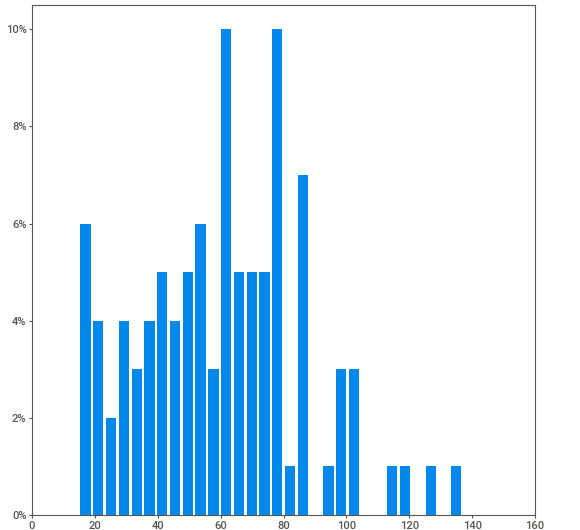
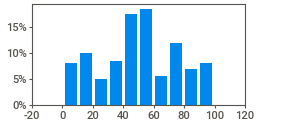
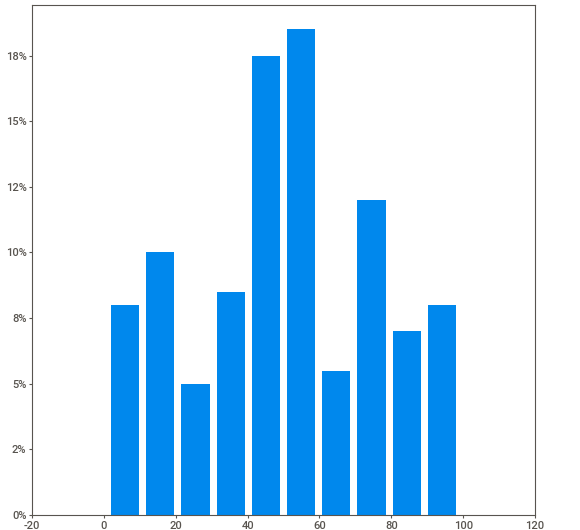
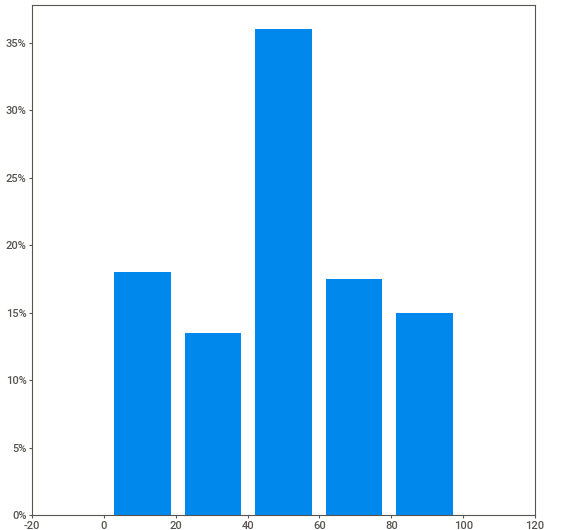
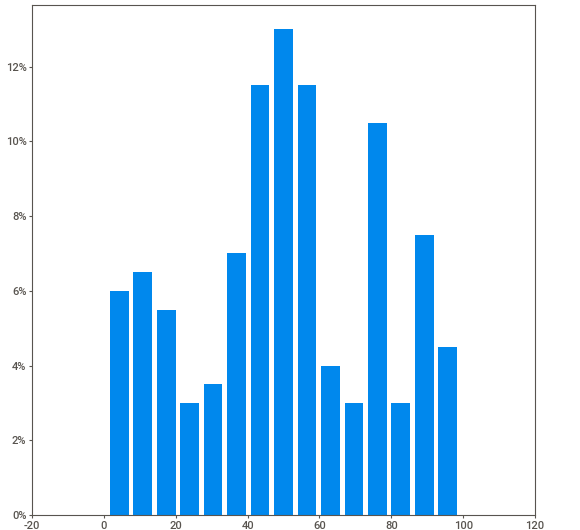
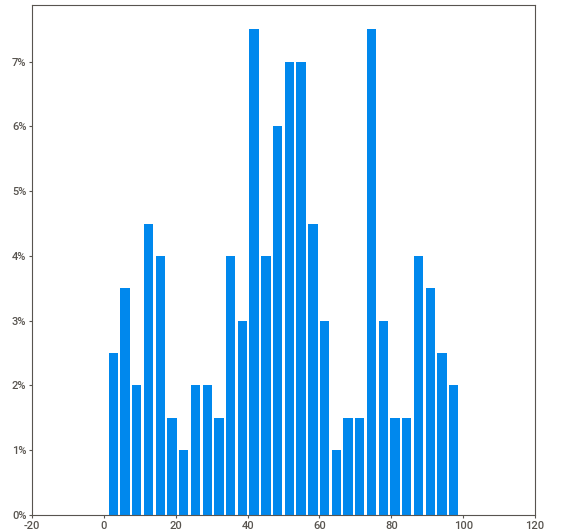
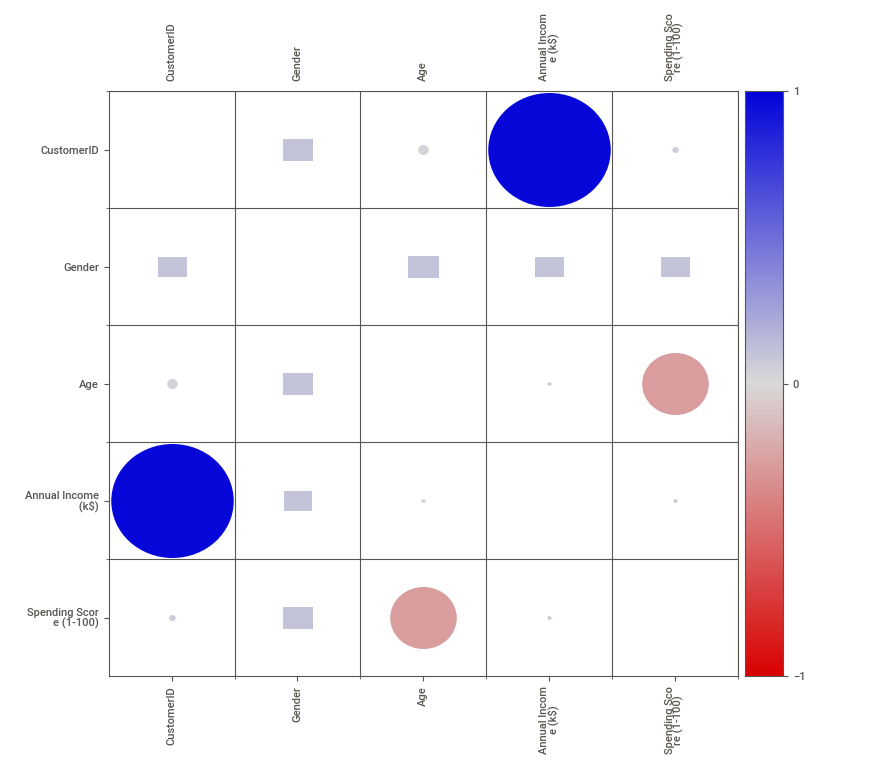
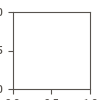

In [16]:
my_report = sv.analyze(df)
my_report.show_notebook()

<AxesSubplot: xlabel='Gender', ylabel='count'>

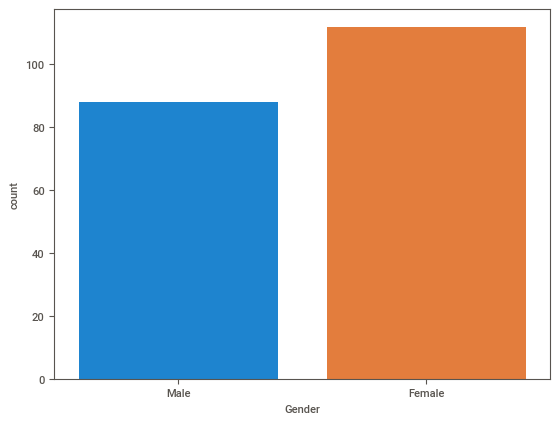

In [18]:
sns.countplot(data=df, x="Gender")


<AxesSubplot: xlabel='Gender', ylabel='Age'>

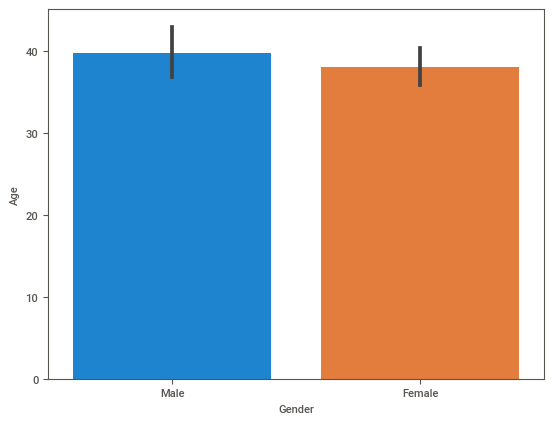

In [21]:
sns.barplot(data=df,x="Gender",y="Age")


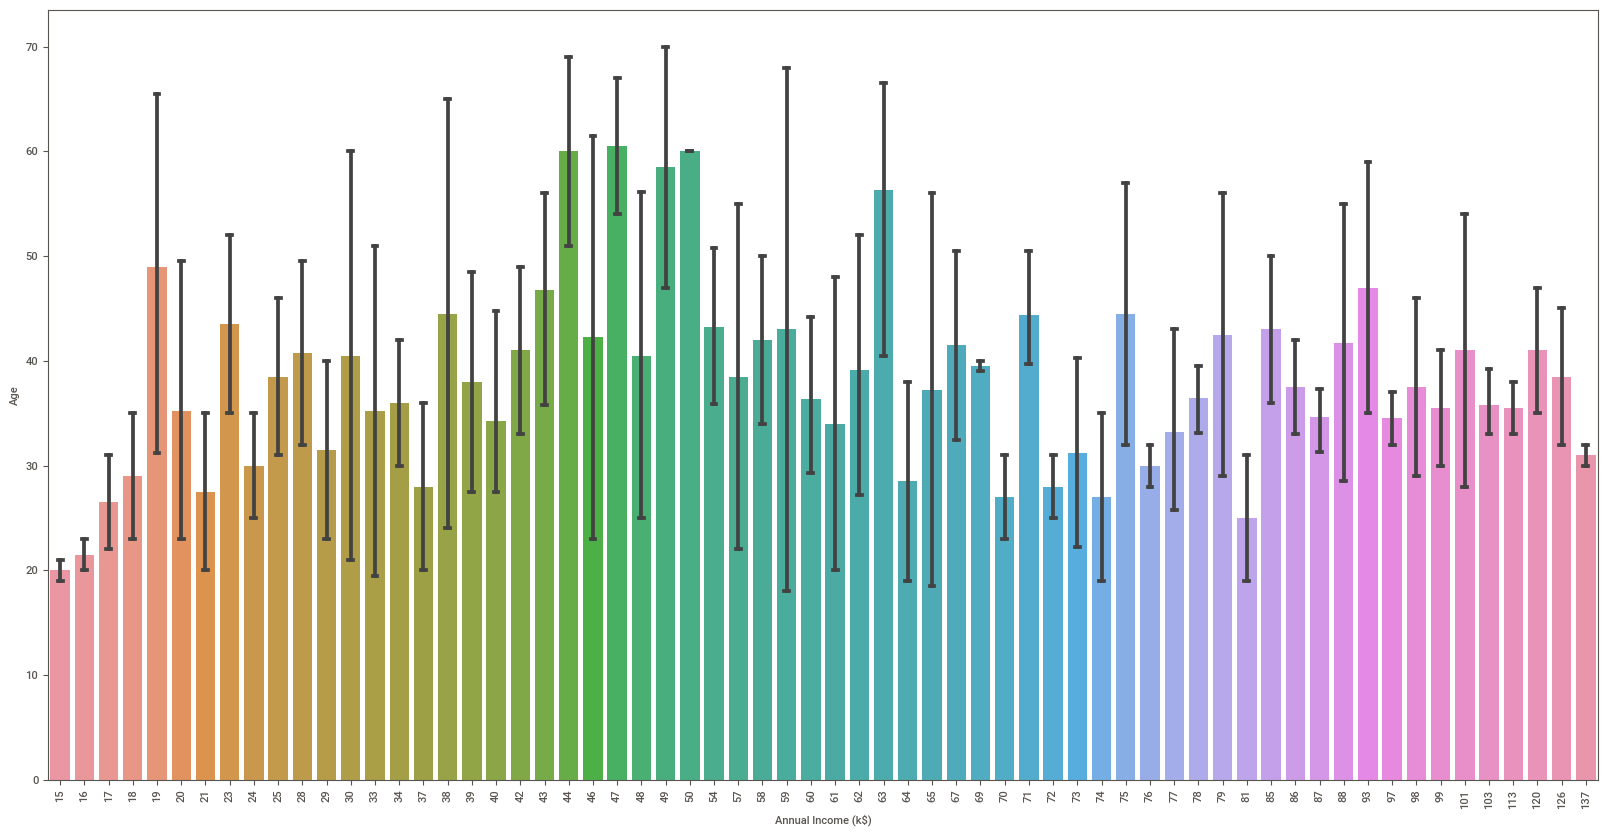

In [25]:
plt.figure(figsize=(20,10)) 
sns.barplot(data=df,x="Annual Income (k$)",y="Age",capsize=.2)
plt.xticks(rotation=90)
plt.show()

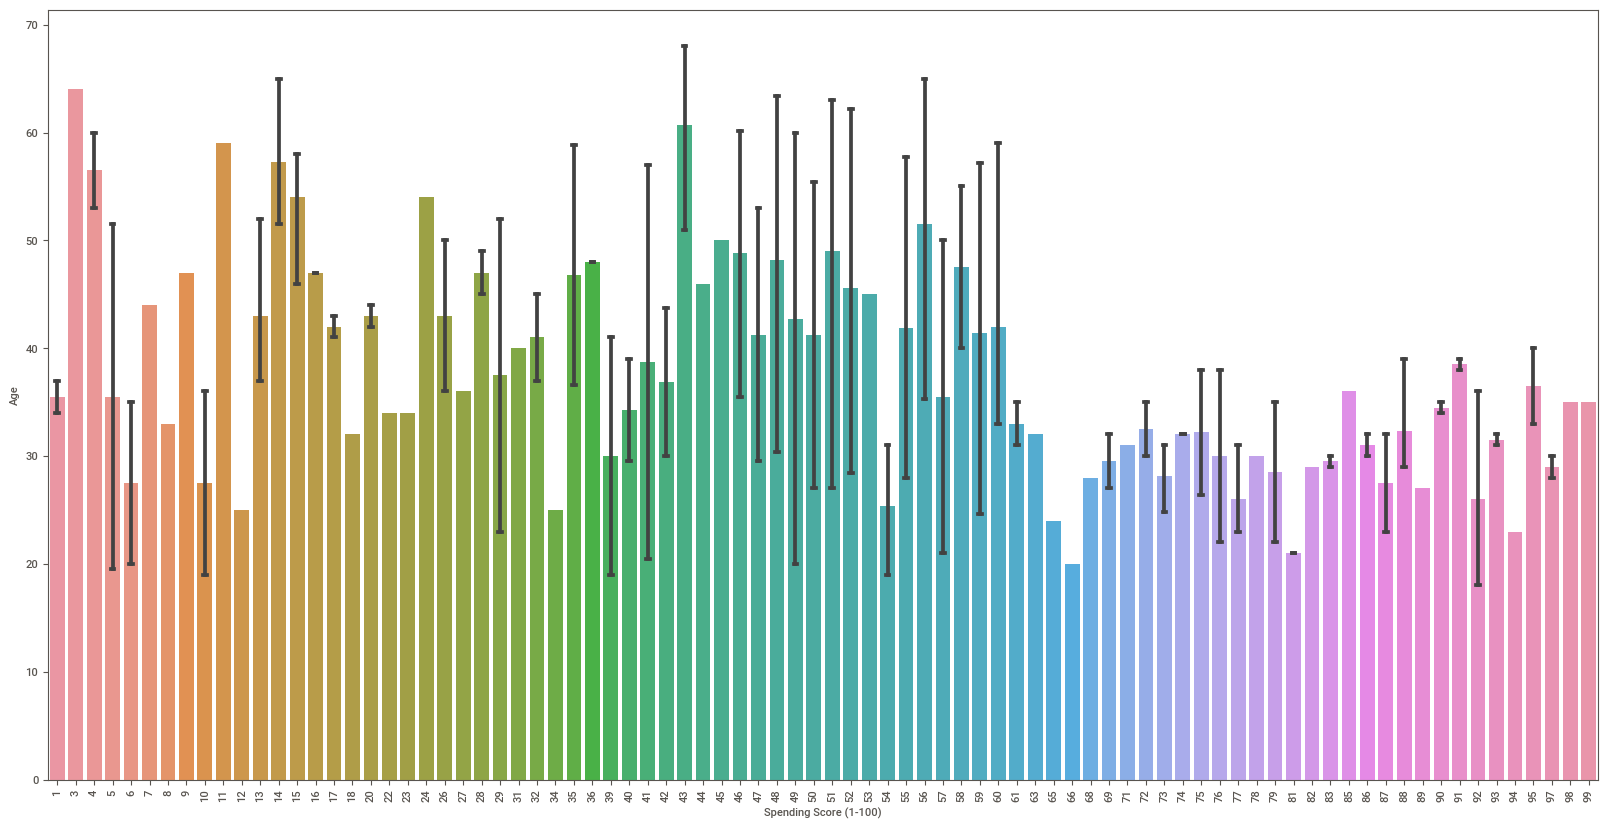

In [26]:
plt.figure(figsize=(20,10)) 
sns.barplot(data=df,x="Spending Score (1-100)",y="Age",capsize=.2)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot: xlabel='Spending Score (1-100)', ylabel='Age'>

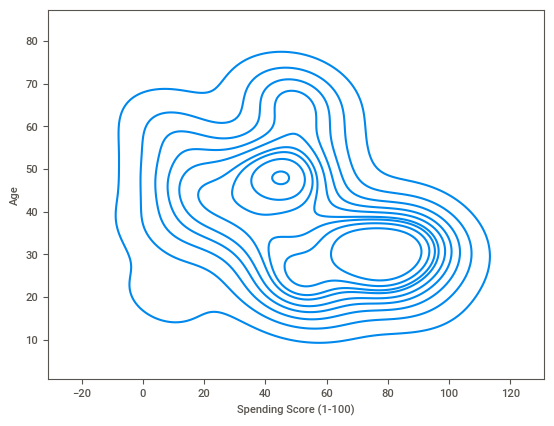

In [29]:
sns.kdeplot(data=df,x="Spending Score (1-100)",y="Age")

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Age'>

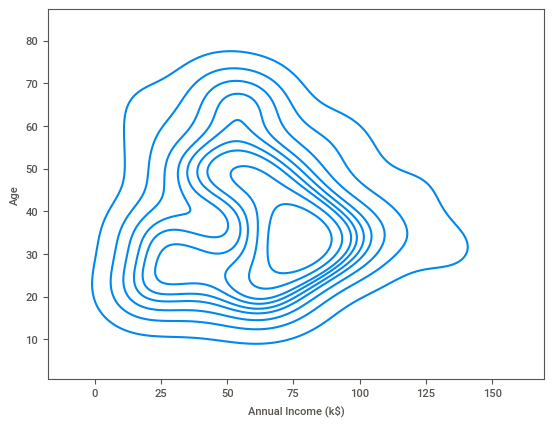

In [30]:
sns.kdeplot(data=df,x="Annual Income (k$)",y="Age")

<AxesSubplot: xlabel='Gender', ylabel='Age'>

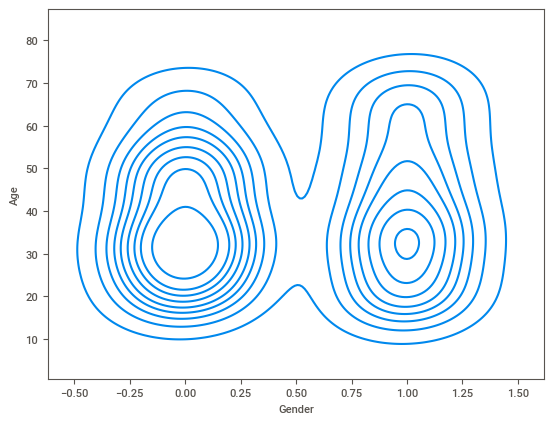

In [32]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
sns.kdeplot(data=df,x="Gender",y="Age")